In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt# Library for plotting the images
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
#import tensorflow as tf# We import the data set from tensorflow and build the model there

%matplotlib inline
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #x_train[0]=60000 as seen above which is the number of images given, 28x28 is the size of the images,
#1 signifies 2^1 colours which means black and white
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)#same for test dataset
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255# Normalize pixel values between 0 and 1
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 15

model = Sequential()#using sequential dataflow model
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))#32 is the number of kernel/filters,3x3 is the size of the filter,we use relu 
#because we dont want any negative values for the pixels,input shape specifies size of input image
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#2x2 is the size of the pooling kernel
model.add(Dropout(0.25))#dropping out the nodes (input and hidden layer) in a neural network
model.add(Flatten())#flatten make the given data to a one dimension array
model.add(Dense(64, activation='relu'))#using dense to connect all the nodes of the cnn architecture to each other
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))#num_classes tell the number of nodes in the output layer

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                589888    
                                                      

In [ ]:
#training the model with adam optimizer
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))#training with the training dataset that we split before and verifying with the test dataset
#print("The model has successfully trained")
              

Epoch 1/15
469/469 [==============================] - 160s 339ms/step - loss: 0.3392 - accuracy: 0.8942 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 2/15
469/469 [==============================] - 163s 347ms/step - loss: 0.1312 - accuracy: 0.9605 - val_loss: 0.0437 - val_accuracy: 0.9841
Epoch 3/15
469/469 [==============================] - 158s 336ms/step - loss: 0.1040 - accuracy: 0.9691 - val_loss: 0.0376 - val_accuracy: 0.9875
Epoch 4/15
469/469 [==============================] - 156s 332ms/step - loss: 0.0843 - accuracy: 0.9743 - val_loss: 0.0371 - val_accuracy: 0.9871
Epoch 5/15
469/469 [==============================] - 155s 331ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.0332 - val_accuracy: 0.9888
Epoch 6/15
469/469 [==============================] - 152s 324ms/step - loss: 0.0683 - accuracy: 0.9792 - val_loss: 0.0327 - val_accuracy: 0.9899
Epoch 7/15
469/469 [==============================] - 153s 327ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0290 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)#Evaluating the model after training
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034223392605781555
Test accuracy: 0.9907000064849854


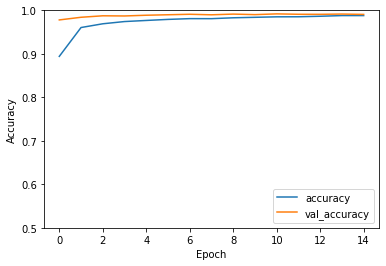

In [ ]:
#plot between accuracy and val_accuracy
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

313/313 [==============================] - 7s 23ms/step


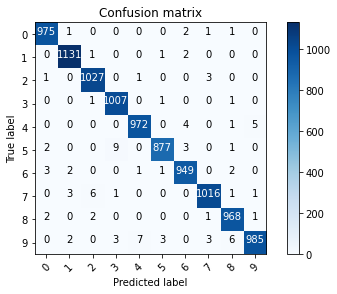

In [ ]:

test_predictions = model.predict(x_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import numpy as np
import itertools
#import tensorflow as tf
#from sklearn.metrics import confusion_matrix

#the below function is to print the confusion matrix in an attractive manner
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion_mtx = confusion_matrix(y_test, np.argmax(test_predictions, axis = 1)) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))